# Complex Model Experiment-Log
<b><br>
After developing the base model, now i have evaluated different Deep Neural Network based NLP techniques.
These have been implemented using Tensorflow 2.0
</b>    
## Loading the Data set:

In [1]:
import pandas as pd
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import pickle
import matplotlib.pyplot as plt

<b>Defining the different flairs that will be available.</b>

In [2]:
flairs = ["AskIndia", "Non-Political",
          "Scheduled", "Photography", "Science/Technology",
          "Politics", "Business/Finance", "Policy/Economy",
          "Sports", "Food"]

In [3]:
data = pd.read_csv('Local Data/f_300_clean.csv')
data.fillna("",inplace = True)

data.replace({'flair': {"AskIndia": 0, "Non-Political": 1,
                      "Scheduled": 2, "Photography": 3,
                     "Science/Technology": 4, "Politics": 5,
                     "Business/Finance": 6, "Policy/Economy": 7,
                     "Sports": 8, "Food": 9 }}, inplace=True)

Y = data.flair
X = data.combined_features

print(X.head())
print(X.shape)

0    differ stage hair loss perfect order mumbai lo...
1    women gather dust storm rajasthan. nan. steve ...
2    zoom took shot night supermoon stack detail lu...
3    wild gaur nagarahol nation park. nan. wild pro...
4    puffi superdog zenfon. nan. nice have tree hou...
Name: combined_features, dtype: object
(2422,)


<b>
Splitting the data into Training and Testing for valuation of accuracy and validation</b>

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
print(len(X_train))
print(len(X_test))

1937
485


<b>
    Initializing some essential variables.
    </b>
 

In [5]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

## Corpus Tokenization:
<br>
<b>
Now i Vectorized the training corpus, by turning each text into either a sequence of integers. The vocabulary size has been set to 5000 words.
    </b>

In [6]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
dict(list(word_index.items())[1:10])

{'like': 2,
 'peopl': 3,
 'hai': 4,
 'india': 5,
 'http': 6,
 'time': 7,
 'good': 8,
 'delet': 9,
 'com': 10}

In [7]:
X_train = tokenizer.texts_to_sequences(X_train)
print(X_train[10])

[841, 2559, 5, 1194, 1, 35, 212, 399, 560, 11, 8, 16, 2559, 57, 167, 224, 262, 180, 997, 2, 937, 5, 1, 32, 426, 167, 47, 163, 246, 1161, 2299, 316, 2515, 32, 426, 288, 1, 2299, 449, 248, 153, 44, 167, 246, 1161, 192, 992, 546, 167, 546, 246, 568, 755, 248, 1891, 449, 377, 771, 8, 187, 1243, 356, 31, 248, 1, 546, 73, 449, 248, 2299, 316, 248, 938, 167, 546, 246, 260, 2466, 874, 2380, 2299, 1589, 679, 1161, 336, 609, 3016, 3, 607, 1405, 449, 968, 59, 1161, 1027, 336, 4578, 249, 2787, 442, 607, 1405, 167, 546, 1161, 315, 422, 638, 356, 16, 357, 63, 1177, 937, 1161, 597, 1205, 47, 1921, 80, 44, 1891, 248, 153, 44, 21, 356, 1, 449, 248, 1306, 679, 204, 1384, 696, 250, 2560, 174, 163, 2741, 243, 1, 376, 1421, 878, 11, 103, 153, 858, 153, 2637, 655, 400, 153, 2637, 37, 1741, 449, 114, 1, 29, 202, 37, 188, 254, 532, 1766, 266, 312, 202, 1661, 2957, 44, 234, 4228, 714, 644, 1831, 581, 44, 1, 130, 29, 841, 2186, 1054, 1007, 383, 234, 414, 532, 702, 757, 298, 9, 20, 1, 1, 1663, 2231, 747, 850, 25

In [8]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

<b>
Adding padding of 0 to each entry in the training data to make the maximum size uniform.
</b>

In [9]:
X_train = pad_sequences(X_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(X_train[0])

[3377    1  188    1    1  840 1705 1622  512   35 1205 1766    1  248
 2069  480  126 2784   12  278    1 3645  574  548   12 1064  355   87
  165 3377  480 4092   12 1220  321  188  333 1600 1380    3  105  254
 1706 3960 2267    1   14  201   13   37   73 1828 1268   62  226   76
 1075   64  321 1600   29   88  126  420  331  480  359    1  699    1
  126 1828  126  420 2462 2033    8   18    1    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

<b>Prepareing the Test data also</b>

In [10]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [11]:
print(Y_train.head())
print(Y_test.head())
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)

1606    9
1517    9
1848    5
1260    8
118     3
Name: flair, dtype: int64
613     0
1266    8
892     6
296     4
611     0
Name: flair, dtype: int64


## Defining a function which plots:
<b>
<br>
The Training and Validation Accuracy V/S number of Epoch
<br>
The Training and Validation Loss V/S number of Epoch
</b>

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

## Define a Sequential Model:


In [13]:
input_dim = X_train.shape[1]  # Number of features

model = tf.keras.Sequential([
    tf.keras.layers.Dense(150,input_dim=input_dim, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.summary()

<b>
Fitting the Model
    </b>

In [14]:
num_epochs = 15
history = model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test), verbose=True)

Train on 1937 samples, validate on 485 samples
Epoch 1/15
1937/1937 [==============================] - 1s 267us/sample - loss: 848.7283 - accuracy: 0.1311 - val_loss: 526.7863 - val_accuracy: 0.1546
Epoch 2/15
1937/1937 [==============================] - 0s 44us/sample - loss: 366.1854 - accuracy: 0.1988 - val_loss: 363.4752 - val_accuracy: 0.1794
Epoch 3/15
1937/1937 [==============================] - 0s 45us/sample - loss: 214.7299 - accuracy: 0.2674 - val_loss: 297.0973 - val_accuracy: 0.1814
Epoch 4/15
1937/1937 [==============================] - 0s 46us/sample - loss: 132.5739 - accuracy: 0.3469 - val_loss: 276.1715 - val_accuracy: 0.1959
Epoch 5/15
1937/1937 [==============================] - 0s 42us/sample - loss: 87.1601 - accuracy: 0.4368 - val_loss: 250.2683 - val_accuracy: 0.1794
Epoch 6/15
1937/1937 [==============================] - 0s 43us/sample - loss: 56.0870 - accuracy: 0.5359 - val_loss: 245.0117 - val_accuracy: 0.1794
Epoch 7/15
1937/1937 [==========================

<b>Analysis and Validation</b>

Training Accuracy: 0.9298
Testing Accuracy:  0.1711


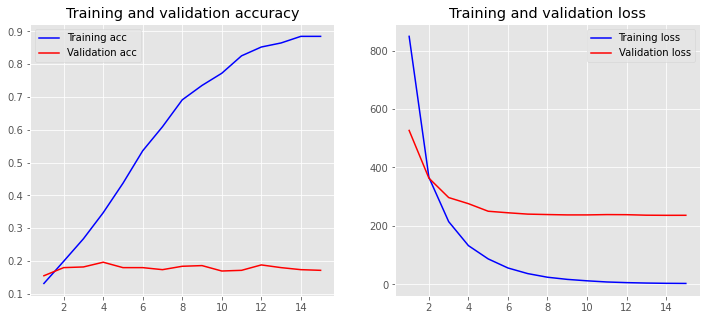

In [15]:
plot_history(history)
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

## Added Embedding and dropout layers to the Model:

In [16]:
input_dim = X_train.shape[1]  # Number of features

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 64)           320000    
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              65000     
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 395,010
Trainable params: 395,010
Non-trainable params: 0
_________________________________________________________________


In [17]:
num_epochs = 15
history = model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test), verbose=True)
model.reset_metrics()
model.save('DL_Model.h5')


Train on 1937 samples, validate on 485 samples
Epoch 1/15
1937/1937 [==============================] - 1s 378us/sample - loss: 2.3015 - accuracy: 0.1177 - val_loss: 2.2916 - val_accuracy: 0.1897
Epoch 2/15
1937/1937 [==============================] - 0s 166us/sample - loss: 2.2209 - accuracy: 0.1755 - val_loss: 2.0675 - val_accuracy: 0.2474
Epoch 3/15
1937/1937 [==============================] - 0s 162us/sample - loss: 1.9333 - accuracy: 0.3077 - val_loss: 1.7971 - val_accuracy: 0.3959
Epoch 4/15
1937/1937 [==============================] - 0s 158us/sample - loss: 1.5760 - accuracy: 0.4734 - val_loss: 1.5060 - val_accuracy: 0.4742
Epoch 5/15
1937/1937 [==============================] - 0s 157us/sample - loss: 1.1587 - accuracy: 0.6386 - val_loss: 1.2402 - val_accuracy: 0.5814
Epoch 6/15
1937/1937 [==============================] - 0s 162us/sample - loss: 0.8504 - accuracy: 0.7512 - val_loss: 1.1359 - val_accuracy: 0.6041
Epoch 7/15
1937/1937 [==============================] - 0s 164us/

Training Accuracy: 0.9995
Testing Accuracy:  0.6412


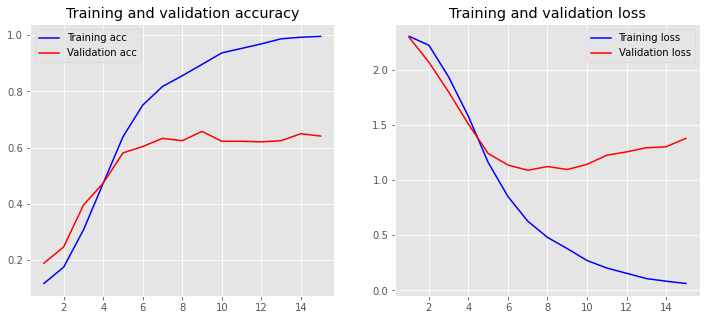

In [18]:
plot_history(history)
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

## Creating a custom embedding matix:

In [19]:
vocab_size = len(tokenizer.word_index) + 1  

import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix
print(vocab_size)

44920


In [20]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('Local Data/glove.6B.50d.txt',
        tokenizer.word_index, embedding_dim)


## % similarity in vocab_size with GloVe:

In [21]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements / vocab_size)

0.377493321460374


## Added custom Embedding:

In [30]:
input_dim = X_train.shape[1]  # Number of features

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                              input_length=max_length, trainable=False),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 50)           2246000   
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              51000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 2,307,010
Trainable params: 61,010
Non-trainable params: 2,246,000
_________________________________________________________________


In [31]:
num_epochs = 45
history = model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test), verbose=True)

Train on 1937 samples, validate on 485 samples
Epoch 1/45
1937/1937 [==============================] - 0s 255us/sample - loss: 2.3038 - accuracy: 0.1538 - val_loss: 2.1255 - val_accuracy: 0.2082
Epoch 2/45
1937/1937 [==============================] - 0s 108us/sample - loss: 2.0915 - accuracy: 0.2700 - val_loss: 1.9784 - val_accuracy: 0.3340
Epoch 3/45
1937/1937 [==============================] - 0s 131us/sample - loss: 1.9272 - accuracy: 0.3371 - val_loss: 1.8300 - val_accuracy: 0.4557
Epoch 4/45
1937/1937 [==============================] - 0s 119us/sample - loss: 1.8127 - accuracy: 0.3815 - val_loss: 1.7423 - val_accuracy: 0.4495
Epoch 5/45
1937/1937 [==============================] - 0s 106us/sample - loss: 1.7381 - accuracy: 0.4027 - val_loss: 1.7250 - val_accuracy: 0.4103
Epoch 6/45
1937/1937 [==============================] - 0s 106us/sample - loss: 1.6799 - accuracy: 0.4218 - val_loss: 1.6396 - val_accuracy: 0.4515
Epoch 7/45
1937/1937 [==============================] - 0s 104us/

Training Accuracy: 0.5854
Testing Accuracy:  0.5175


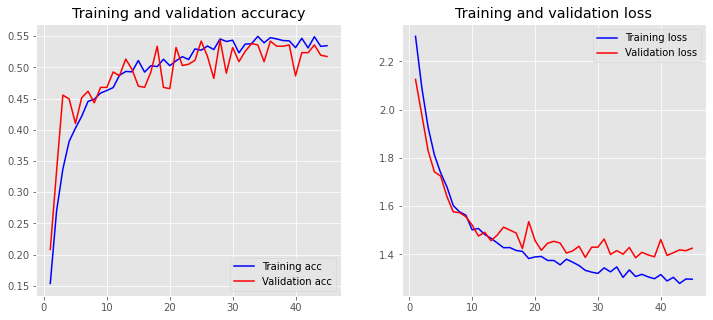

In [32]:
plot_history(history)
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

## Added custom word Embedding which is trainable with our training data:

In [33]:
input_dim = X_train.shape[1]  # Number of features

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                              input_length=max_length, trainable=True),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 50)           2246000   
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              51000     
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                10010     
Total params: 2,307,010
Trainable params: 2,307,010
Non-trainable params: 0
_________________________________________________________________


In [34]:
num_epochs = 35
history = model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test), verbose=True)

Train on 1937 samples, validate on 485 samples
Epoch 1/35
1937/1937 [==============================] - 2s 904us/sample - loss: 2.3004 - accuracy: 0.1600 - val_loss: 2.0773 - val_accuracy: 0.3526
Epoch 2/35
1937/1937 [==============================] - 1s 719us/sample - loss: 2.0507 - accuracy: 0.2793 - val_loss: 1.9335 - val_accuracy: 0.3010
Epoch 3/35
1937/1937 [==============================] - 1s 724us/sample - loss: 1.8260 - accuracy: 0.3893 - val_loss: 1.7257 - val_accuracy: 0.4619
Epoch 4/35
1937/1937 [==============================] - 1s 728us/sample - loss: 1.6430 - accuracy: 0.4414 - val_loss: 1.5953 - val_accuracy: 0.4495
Epoch 5/35
1937/1937 [==============================] - 1s 733us/sample - loss: 1.4789 - accuracy: 0.4879 - val_loss: 1.4724 - val_accuracy: 0.5278
Epoch 6/35
1937/1937 [==============================] - 1s 721us/sample - loss: 1.3539 - accuracy: 0.5359 - val_loss: 1.4417 - val_accuracy: 0.5113
Epoch 7/35
1937/1937 [==============================] - 1s 750us/

Training Accuracy: 0.9448
Testing Accuracy:  0.6186


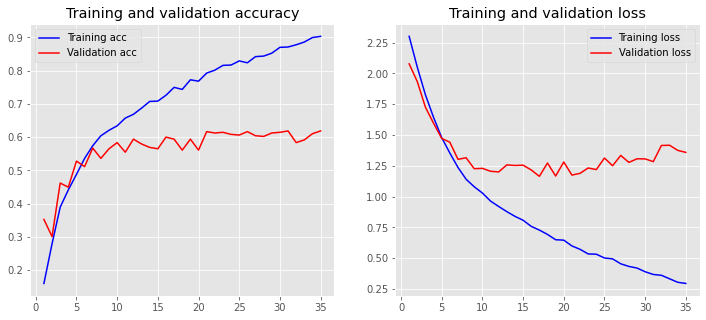

In [35]:
plot_history(history)
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

## Implementing RNN using LSTM:

In [36]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 50)          2246000   
_________________________________________________________________
bidirectional (Bidirectional (None, 100)               40400     
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              101000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                10010     
Total params: 2,397,410
Trainable params: 2,397,410
Non-trainable params: 0
_________________________________________________________________


In [37]:
num_epochs = 15
history = model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test), verbose=True)

Train on 1937 samples, validate on 485 samples
Epoch 1/15
1937/1937 [==============================] - 8s 4ms/sample - loss: 2.0724 - accuracy: 0.2189 - val_loss: 1.9084 - val_accuracy: 0.2598
Epoch 2/15
1937/1937 [==============================] - 6s 3ms/sample - loss: 1.7181 - accuracy: 0.3356 - val_loss: 1.6078 - val_accuracy: 0.3732
Epoch 3/15
1937/1937 [==============================] - 6s 3ms/sample - loss: 1.3688 - accuracy: 0.4388 - val_loss: 1.4845 - val_accuracy: 0.4309
Epoch 4/15
1937/1937 [==============================] - 6s 3ms/sample - loss: 1.0110 - accuracy: 0.5896 - val_loss: 1.5300 - val_accuracy: 0.4619
Epoch 5/15
1937/1937 [==============================] - 6s 3ms/sample - loss: 0.6906 - accuracy: 0.7341 - val_loss: 1.6551 - val_accuracy: 0.5072
Epoch 6/15
1937/1937 [==============================] - 6s 3ms/sample - loss: 0.4413 - accuracy: 0.8508 - val_loss: 2.0403 - val_accuracy: 0.4907
Epoch 7/15
1937/1937 [==============================] - 6s 3ms/sample - loss:

Training Accuracy: 1.0000
Testing Accuracy:  0.5505


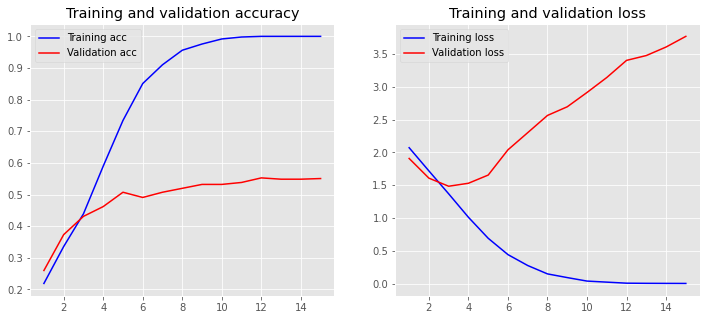

In [38]:
plot_history(history)
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

## Added a Convolutional layer to the model:

In [42]:
input_dim = X_train.shape[1]  # Number of features

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 3, activation='relu'),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 200, 50)           2246000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 198, 128)          19328     
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 500)               64500     
_________________________________________________________________
dropout_7 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5010      
Total params: 2,334,838
Trainable params: 2,334,838
Non-trainable params: 0
____________________________________________

In [43]:
num_epochs = 9
history = model.fit(X_train, Y_train, epochs=num_epochs, validation_data=(X_test, Y_test), verbose=True)

Train on 1937 samples, validate on 485 samples
Epoch 1/9
1937/1937 [==============================] - 2s 1ms/sample - loss: 2.2679 - accuracy: 0.1435 - val_loss: 2.1125 - val_accuracy: 0.2660
Epoch 2/9
1937/1937 [==============================] - 2s 891us/sample - loss: 1.9346 - accuracy: 0.2808 - val_loss: 1.8532 - val_accuracy: 0.3010
Epoch 3/9
1937/1937 [==============================] - 2s 948us/sample - loss: 1.6693 - accuracy: 0.3934 - val_loss: 1.5438 - val_accuracy: 0.4887
Epoch 4/9
1937/1937 [==============================] - 2s 1ms/sample - loss: 1.1709 - accuracy: 0.6138 - val_loss: 1.2705 - val_accuracy: 0.5649
Epoch 5/9
1937/1937 [==============================] - 2s 873us/sample - loss: 0.7385 - accuracy: 0.7636 - val_loss: 1.1268 - val_accuracy: 0.6165
Epoch 6/9
1937/1937 [==============================] - 2s 815us/sample - loss: 0.4265 - accuracy: 0.8771 - val_loss: 1.0921 - val_accuracy: 0.6392
Epoch 7/9
1937/1937 [==============================] - 2s 806us/sample - lo

Training Accuracy: 1.0000
Testing Accuracy:  0.6289


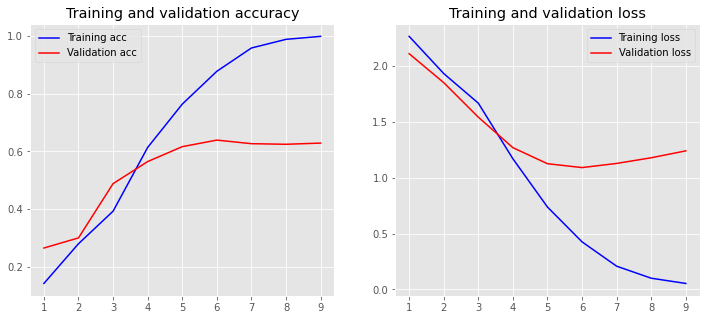

In [44]:
plot_history(history)
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

## Manually checked best results with different number of layers and kernel size in conv layer. The accuracies are :
<b>
For 32 5 is 47%<br>
For 32 3 is 52%<br>
For 32 7 is 46%<br>
For 64 3 is 56%<br>
For 64 5 is 55%<br>
For 64 7 is 49%<br>
For 128 3 is 62%<br>
For 128 5 is 52%<br>
For 128 7 is 50%<br>
For 128 13 is 50%<br>